<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/NLP_keyword_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Keyword Analysis (Korean)

---



## Korean font install

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = 'user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


After install, Colab menu > Runtime > Restart runtime

## KoNLPy and MeCab
---
https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh


In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


## Data

---
https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt


In [ ]:
import urllib.request
raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'9976970\t\xec\x95\x84 \xeb\x8d\x94\xeb\xb9\x99.. \xec\xa7\x84\xec\xa7\x9c \xec\xa7\x9c\xec\xa6\x9d\xeb\x82\x98\xeb\x84\xa4\xec\x9a\x94 \xeb\xaa\xa9\xec\x86\x8c\xeb\xa6\xac\t0\n', b'3819312\t\xed\x9d\xa0...\xed\x8f\xac\xec\x8a\xa4\xed\x84\xb0\xeb\xb3\xb4\xea\xb3\xa0 \xec\xb4\x88\xeb\x94\xa9\xec\x98\x81\xed\x99\x94\xec\xa4\x84....\xec\x98\xa4\xeb\xb2\x84\xec\x97\xb0\xea\xb8\xb0\xec\xa1\xb0\xec\xb0\xa8 \xea\xb0\x80\xeb\xb3\x8d\xec\xa7\x80 \xec\x95\x8a\xea\xb5\xac\xeb\x82\x98\t1\n', b'10265843\t\xeb\x84\x88\xeb\xac\xb4\xec\x9e\xac\xeb\xb0\x93\xec\x97\x88\xeb\x8b\xa4\xea\xb7\xb8\xeb\x9e\x98\xec\x84\x9c\xeb\xb3\xb4\xeb\x8a\x94\xea\xb2\x83\xec\x9d\x84\xec\xb6\x94\xec\xb2\x9c\xed\x95\x9c\xeb\x8b\xa4\t0\n', b'9045019\t\xea\xb5\x90\xeb\x8f\x84\xec\x86\x8c \xec\x9d\xb4\xec\x95\xbc\xea\xb8\xb0\xea\xb5\xac\xeb\xa8\xbc ..\xec\x86\x94\xec\xa7\x81\xed\x9e\x88 \xec\x9e\xac\xeb\xaf\xb8\xeb\x8a\x94 \xec\x97\x86\xeb\x8b\xa4..\xed\x8f\x89\xec\xa0\x90 \xec\xa1\xb0\xec\xa0\x95\t0

In [ ]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])
print(reviews[:5])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']


## extract Noun only

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    nouns.append(noun)
nouns[:10]

['짜증', '나', '목소리', '포스터', '초딩', '영화', '줄', '오버', '연기', '교도소']

## Stopwords

---

- 불용어 예: 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것
- 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: 영화)

In [ ]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것']


In [ ]:
nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words: #stopwords
      nouns.append(noun)
nouns[:10]

['짜증', '목소리', '포스터', '초딩', '오버', '연기', '교도소', '이야기', '재미', '평점']

## word frequencies

In [ ]:
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'감독': 4194,
 '감동': 4860,
 '결말': 1571,
 '공포': 1512,
 '굿': 1580,
 '기대': 2566,
 '기억': 1784,
 '남자': 1554,
 '내용': 4247,
 '년': 3669,
 '돈': 2264,
 '드라마': 5192,
 '때문': 1750,
 '마음': 1591,
 '마지막': 2755,
 '명작': 2033,
 '배우': 4450,
 '사람': 5035,
 '사랑': 3492,
 '생각': 5168,
 '소재': 1531,
 '스토리': 5422,
 '시간': 4002,
 '쓰레기': 3509,
 '애': 2052,
 '액션': 2682,
 '여자': 1994,
 '연기': 6835,
 '연출': 1761,
 '우리': 1863,
 '이건': 2723,
 '이게': 2269,
 '이상': 1983,
 '이야기': 2194,
 '이해': 2049,
 '인생': 1518,
 '작품': 2977,
 '장면': 2446,
 '재미': 4111,
 '전개': 1549,
 '정도': 2761,
 '주인공': 1921,
 '처음': 2015,
 '최고': 6595,
 '최악': 2255,
 '편': 2285,
 '평점': 6297,
 '하나': 2937,
 '한국': 1974,
 '현실': 1627}

## Visualization

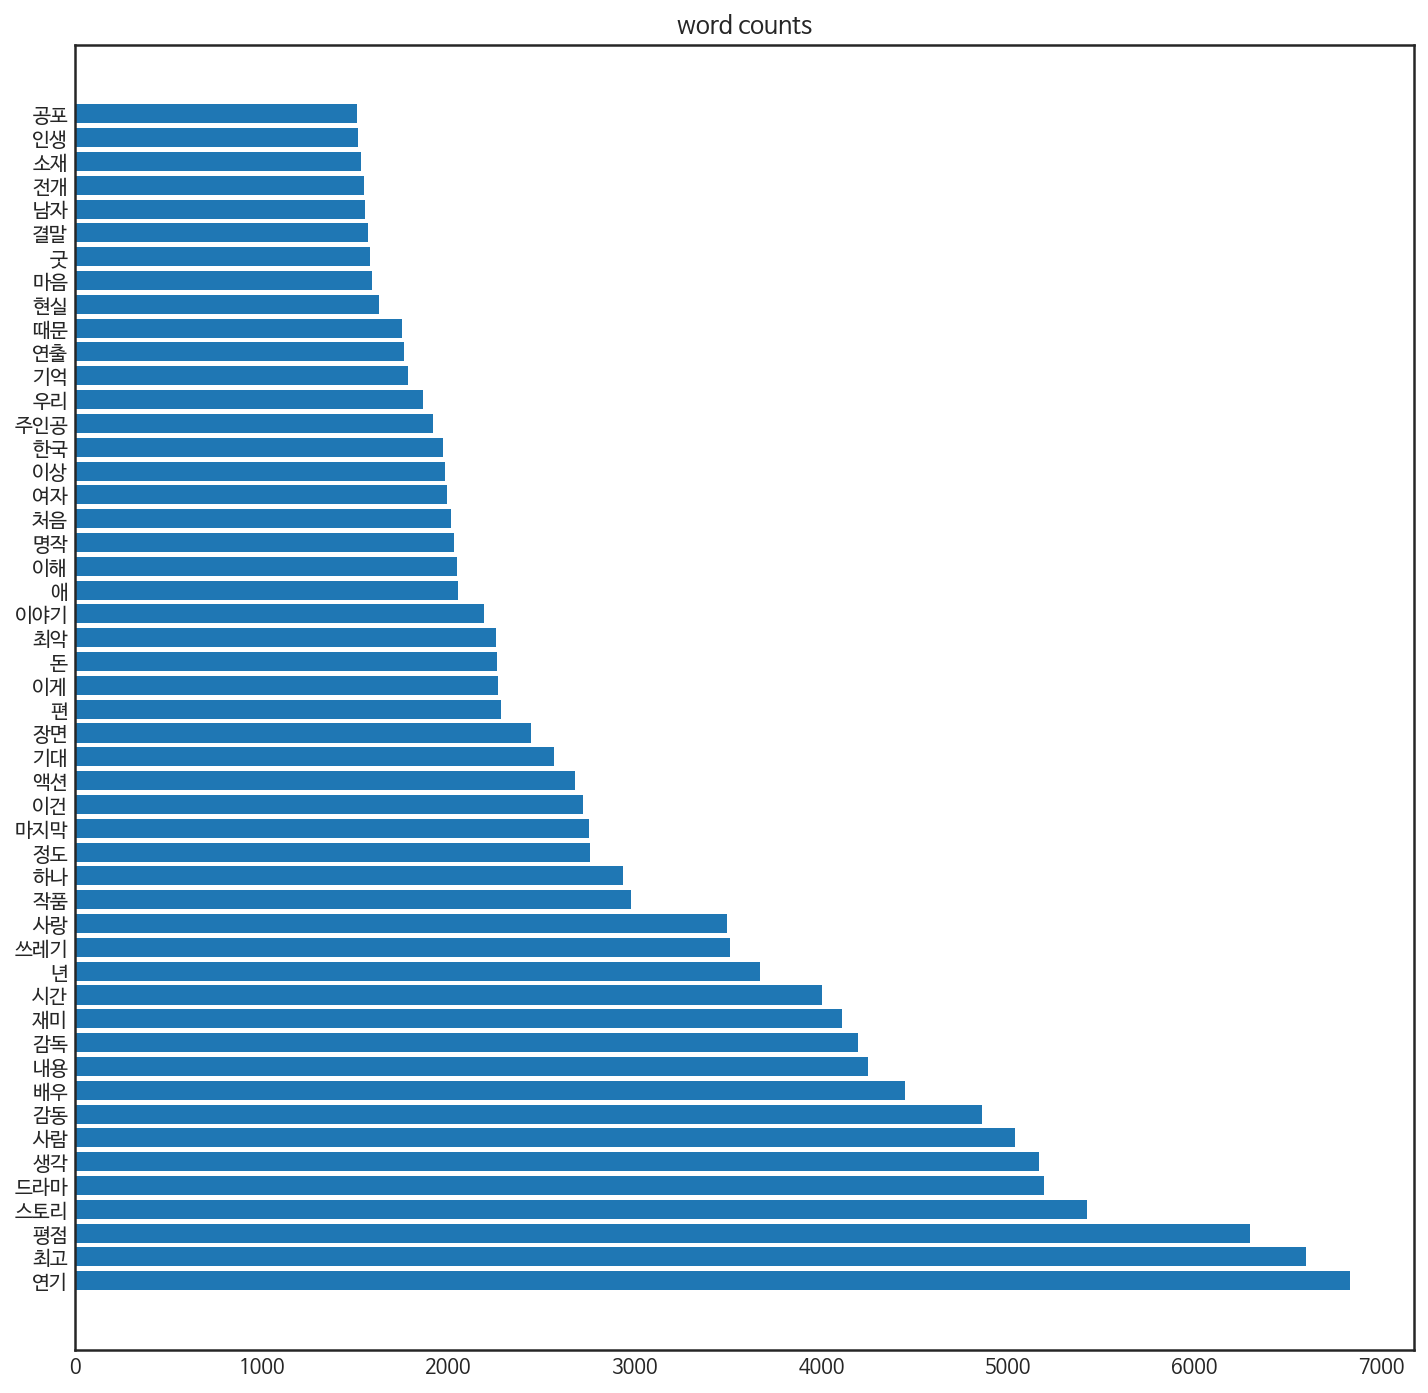

In [ ]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('word counts')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',
               font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

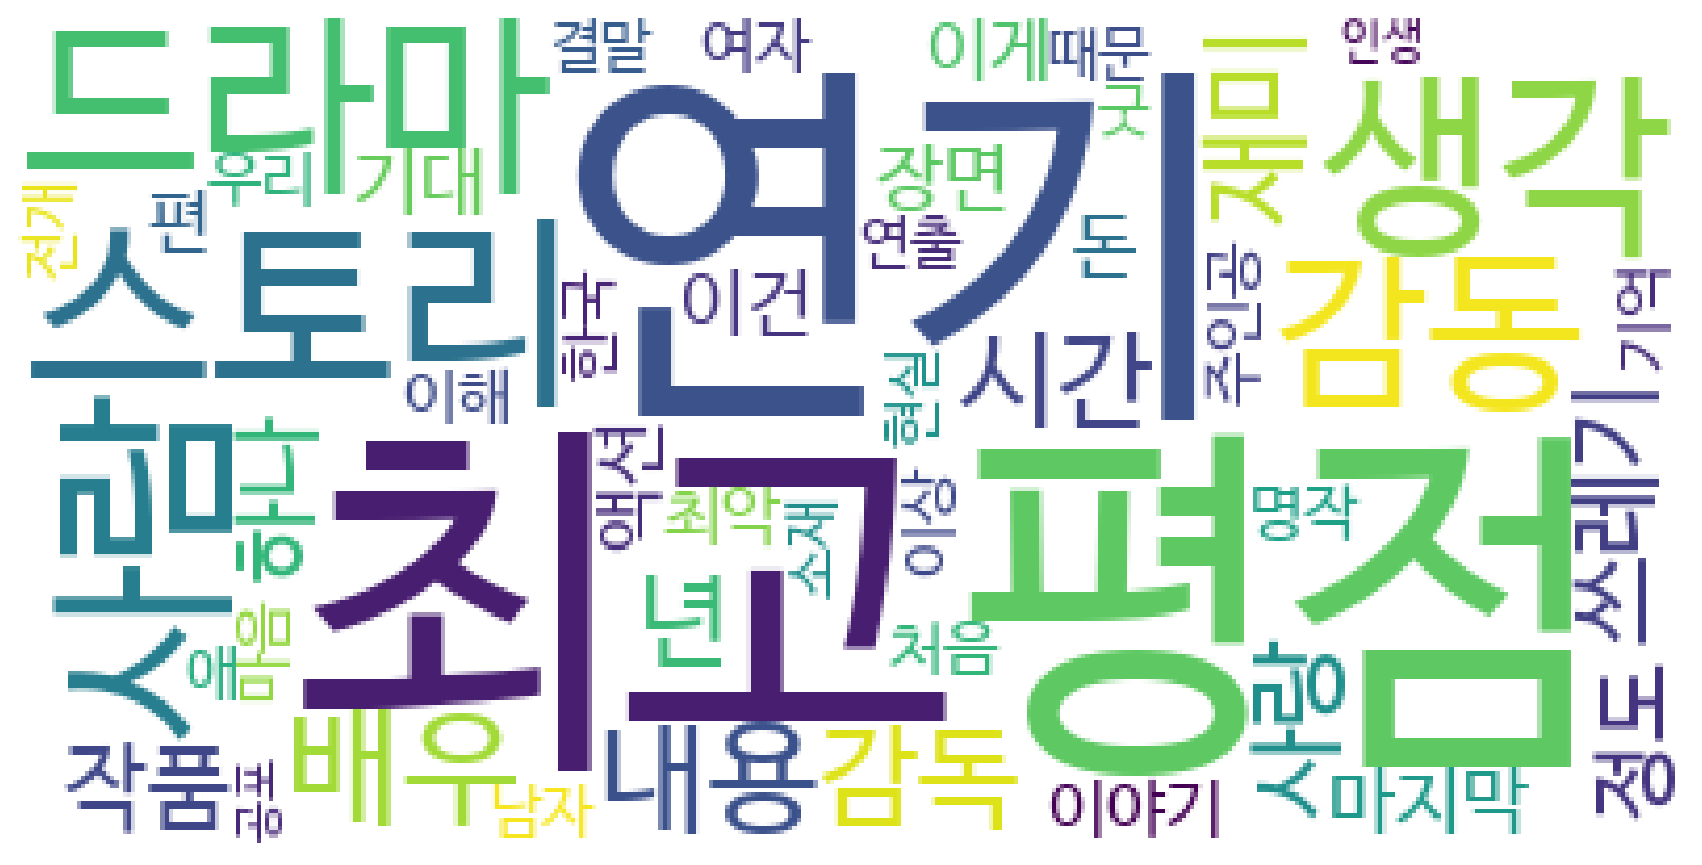

In [ ]:
figure = plt.figure(figsize=(15,15))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

## squarify Treemap

In [ ]:
!pip install squarify

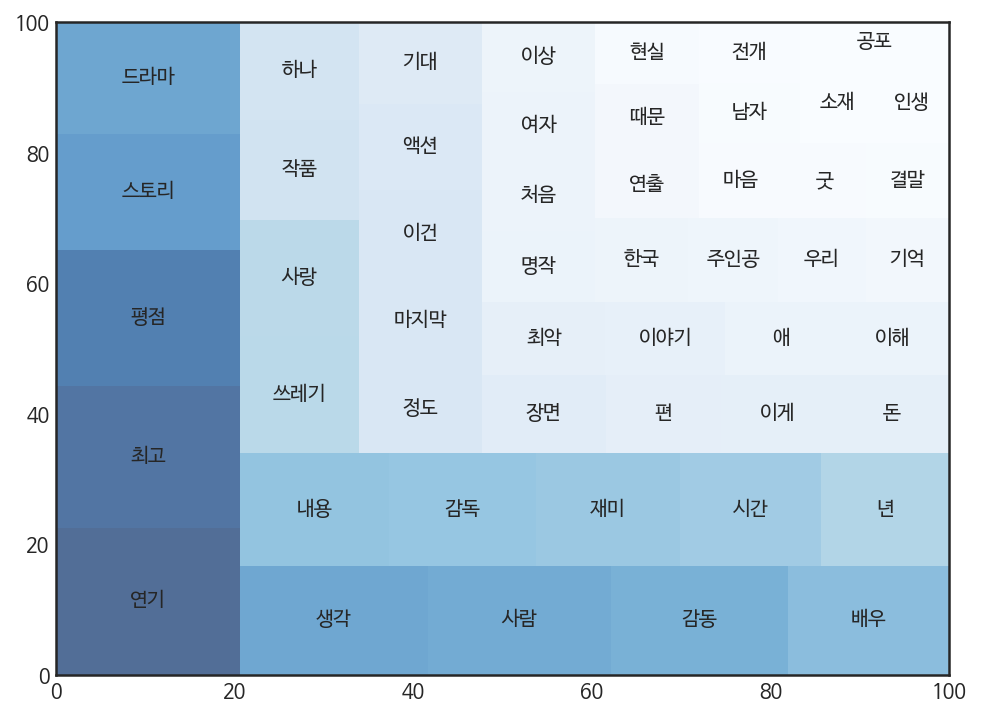

In [ ]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]
figure = plt.figure(figsize=(8,6))
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);